In [16]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import pyodbc
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
cnqa = pyodbc.connect('DRIVER={SQL Server};SERVER=qasazr-cbisql01;DATABASE=ML_Test')

In [3]:
from_date = "20120901"
to_date = "20170831"
comp_code = "1050"
sql1 = "EXEC [ML_Test].[dbo].[ML_ILM_REG_BY_CENTRE01]" + "@FromDate = '" + from_date
sql2 = "',  @ToDate = '" + to_date + "',  @CompanyCode = N'" + comp_code + "'"
sql = sql1 + sql2

series = pd.read_sql(sql,cnqa)

In [4]:
series.head()

,centre_no,Year_Month,Fee Income
0,008363,2014-01-01,0.0
1,030075,2016-10-01,3055.0
2,007117,2016-10-01,129.0
3,721453,2016-12-01,236.0
4,001057,2016-11-01,1587.0


            Fee Income
Year_Month            
2013-09-01     25361.0
2013-10-01     50569.0
2013-11-01     24361.0
2013-12-01     16527.0
2014-01-01     22377.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


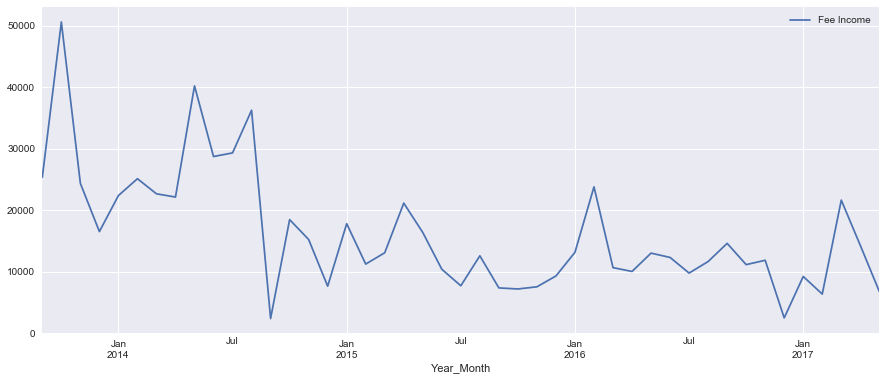

In [12]:
# To plot time series, index should be date format
series1 = series[series.centre_no == '073165']
series1['Year_Month'] = pd.to_datetime(series1['Year_Month'])
series1.set_index('Year_Month',inplace=True)
series1 = series1.sort_index()
series1 = series1[['Fee Income']]
print(series1.head())
series1.plot(figsize=(15, 6))

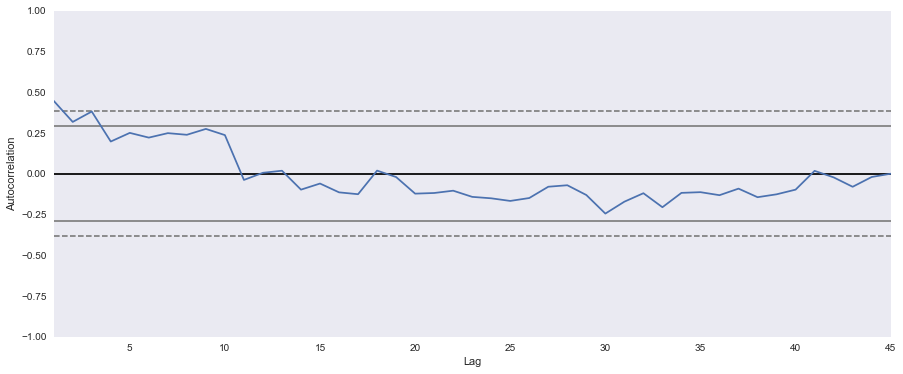

In [9]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(15,6))
autocorrelation_plot(series1)

In [13]:
series1.head()

,Fee Income
Year_Month,
2013-09-01,25361.0
2013-10-01,50569.0
2013-11-01,24361.0
2013-12-01,16527.0
2014-01-01,22377.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Fee Income   No. Observations:                   44
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -459.303
Method:                       css-mle   S.D. of innovations           8202.196
Date:                Thu, 25 May 2017   AIC                            926.605
Time:                        11:37:25   BIC                            933.742
Sample:                    10-01-2013   HQIC                           929.252
                         - 05-01-2017                                         
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               -489.7872    598.118     -0.819      0.418     -1662.077   682.503
ar.L1.D.Fee Income    -0.6668      0.142     -4.681      0.000        -0.946    -0.388
ar.L2.D.Fee Income  

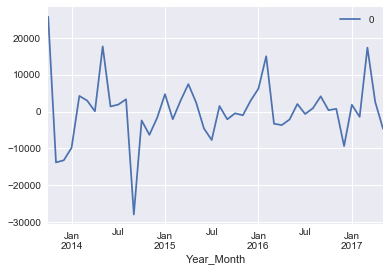

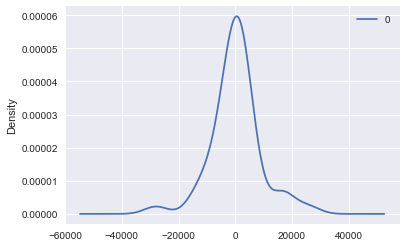

In [25]:
# fit model
model = ARIMA(series1, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
#plt.show()
residuals.plot(kind='kde')
#plt.show()
print(residuals.describe())

predicted=7665.277669, expected=23794.000000
predicted=13605.679163, expected=10672.000000
predicted=13439.276893, expected=10048.000000
predicted=15275.113792, expected=13027.000000
predicted=9767.910585, expected=12326.000000
predicted=9974.559963, expected=9787.000000
predicted=10396.848375, expected=11660.000000
predicted=10171.921254, expected=14613.000000
predicted=10449.052837, expected=11157.000000
predicted=10846.271250, expected=11866.000000
predicted=11789.026997, expected=2505.000000
predicted=7061.784511, expected=9230.000000
predicted=7549.297357, expected=6375.000000
predicted=3769.730188, expected=21637.000000
predicted=11477.741805, expected=14284.000000
predicted=11940.555684, expected=6792.000000
Test MSE: 47539439.487


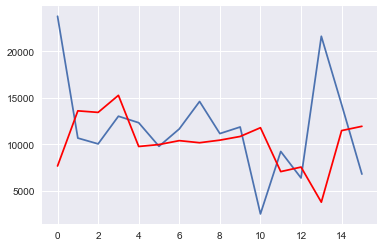

In [26]:
X = series1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')